In [2]:
from IPython.display import Image
import requests
import base64
from snet_cli.sdk import Session, Client, AutoFundingFundingStrategy
from snet_cli.config import Config


# Load config from ~/.snet/config
session = Session(Config())

# Create a client
client = Client(session, "snet", "siggraph-colorization", AutoFundingFundingStrategy(amount_cogs=1, expiration="+10days"))

# Checking account address
client.ident.get_address()

'0xA6E06cF37110930D2906e6Ae70bA6224eDED917B'

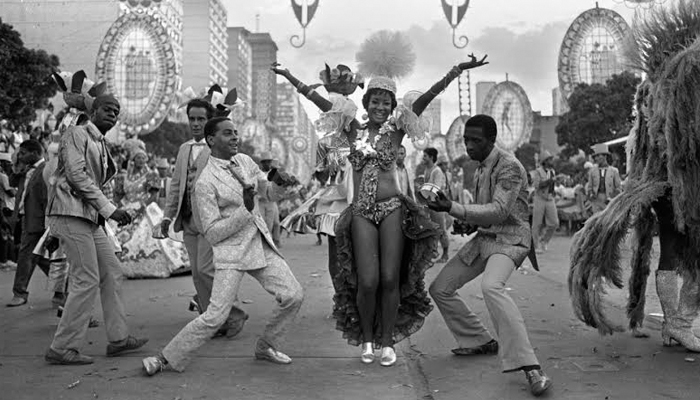

In [3]:
# Checking the input Image
r = requests.get("https://snet-models.s3.amazonaws.com/bh/Colorize/carnaval.jpg")
file_name = "carnaval.jpg"
with open(file_name, "wb") as fd:
    fd.write(r.content)
Image(filename='carnaval.jpg')

In [5]:
# Create a request
request = client.classes.Input(img_input="https://snet-models.s3.amazonaws.com/bh/Colorize/carnaval.jpg")

In [7]:
# Get the response
response = client.stub.colorize(request)

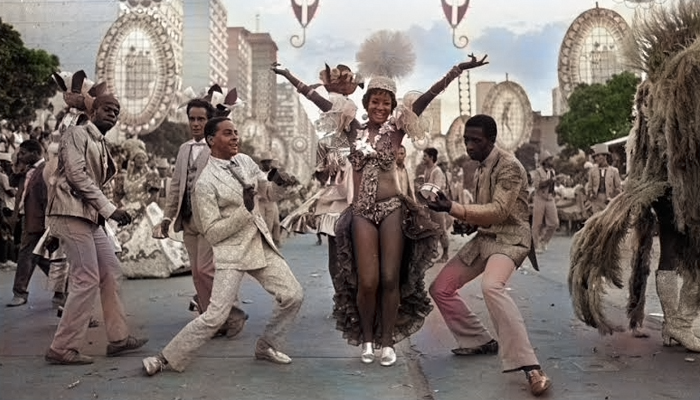

In [8]:
# Convert base64 bytes to JPG image
img_data = base64.b64decode(response.img_colorized)
file_name = "carnaval_colorized.jpg"
with open(file_name, "wb") as fd:
    fd.write(img_data)

# Checking the image that was returned from service
Image(filename='carnaval_colorized.jpg') 